In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns





In [5]:
url = "https://raw.githubusercontent.com/Ghulam-Mustafa-Rao/Regression-Case-Study-Project/main/Admission_Predict.csv"
df = pd.read_csv(url)

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
df["SOP"].value_counts()
# column--- less than 10 unique values in numb--- categorical

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df["LOR "].value_counts() #less than 10 -- categorical

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [10]:
# Check whether there are empty rows or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [11]:
df["Research"].value_counts()

,count
Research,
1,219
0,181


- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

In [12]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [13]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [14]:
#check for missing values
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [15]:
#chekc for duplicates
df.duplicated().sum()

np.int64(0)

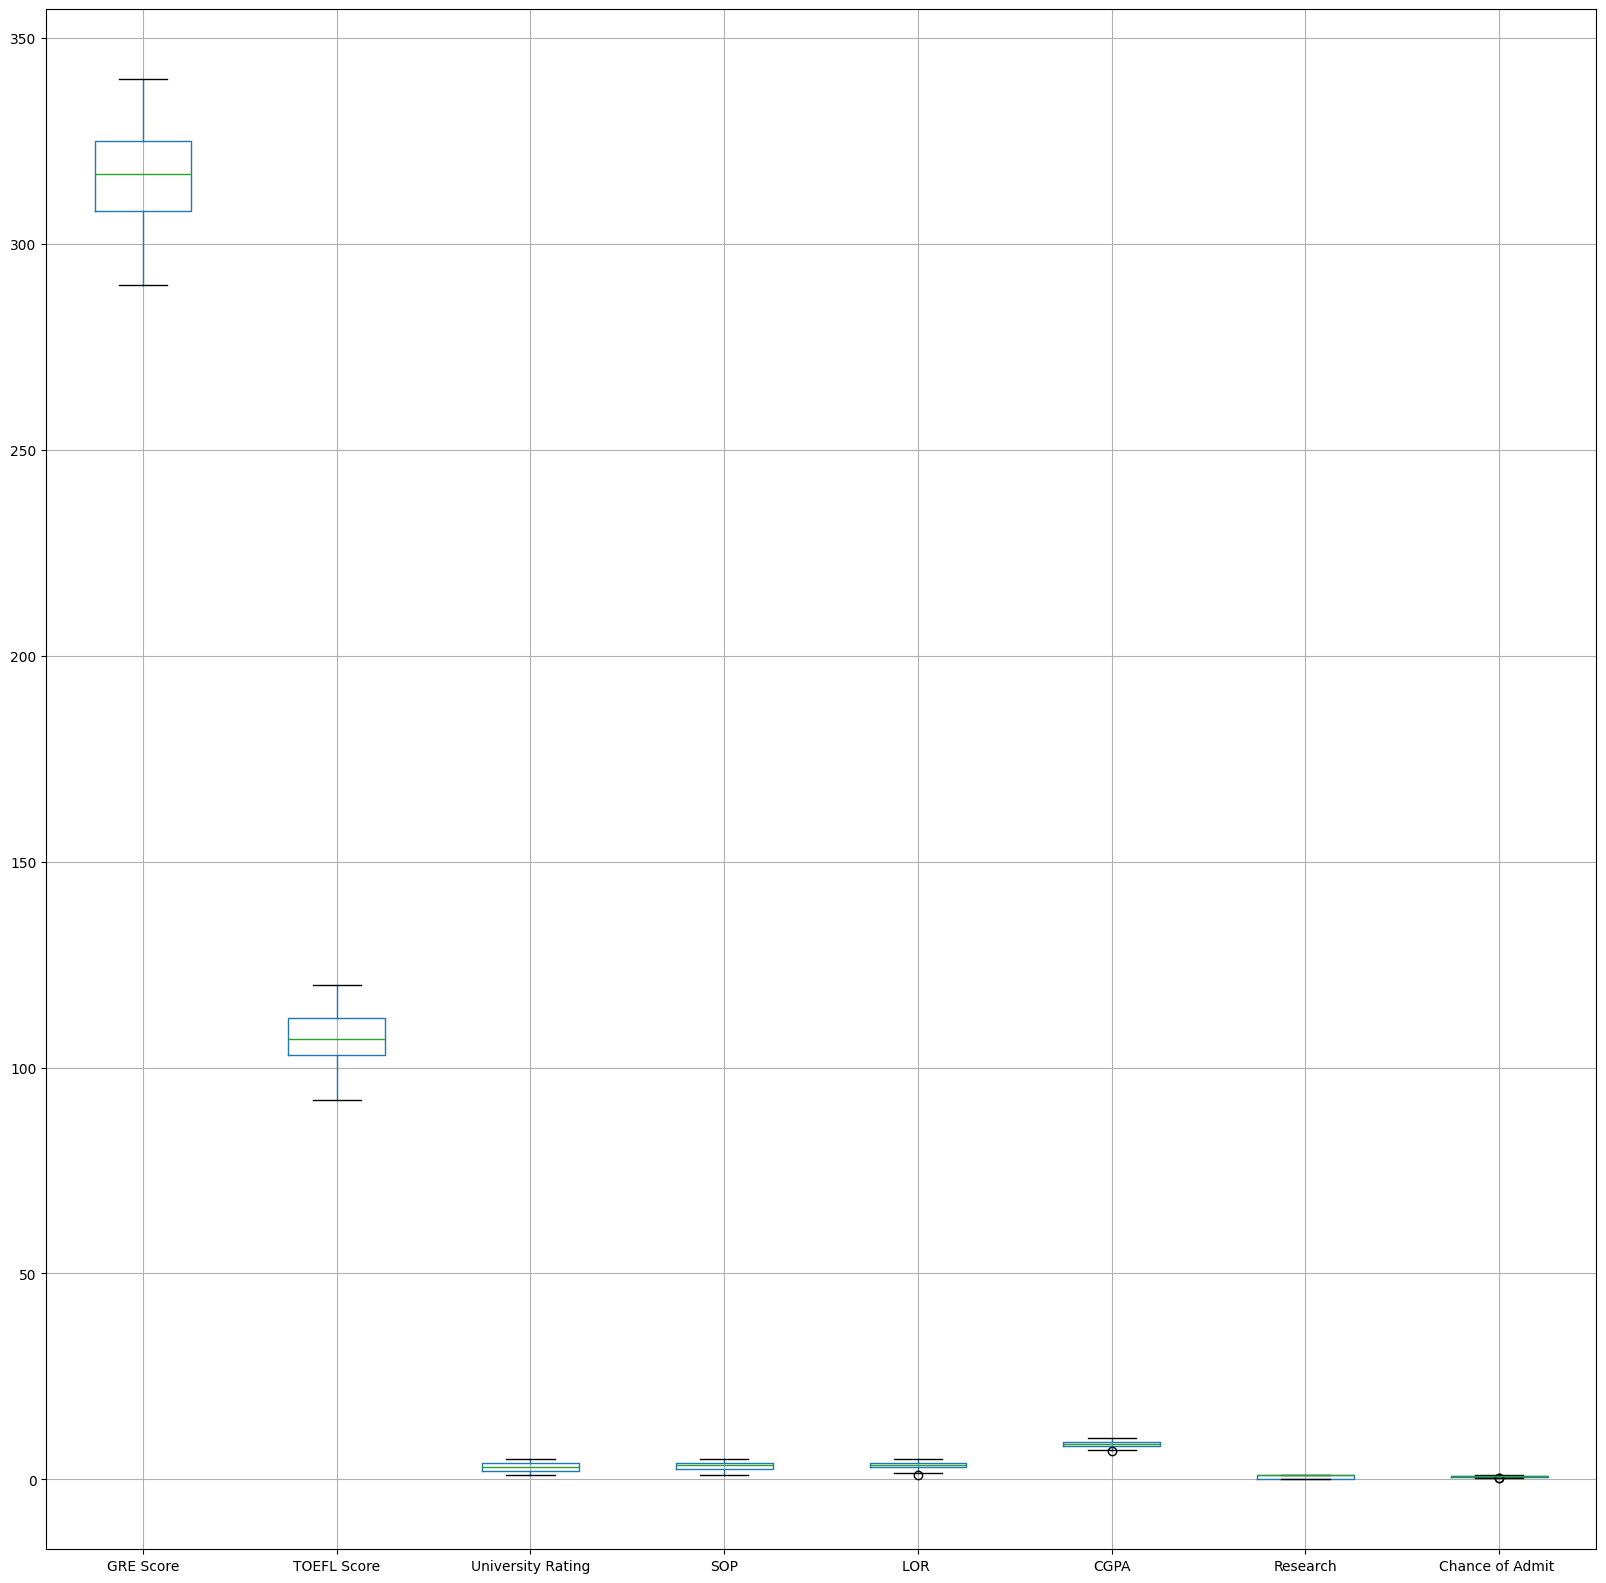

In [16]:
#check fro outliers in whole data
df.boxplot(figsize=(20,20))
plt.show()

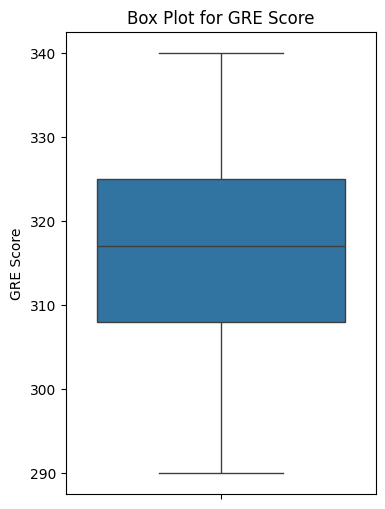

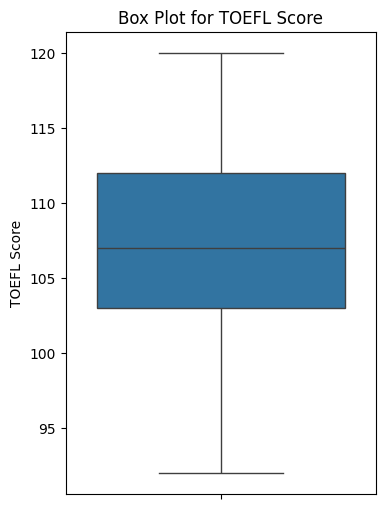

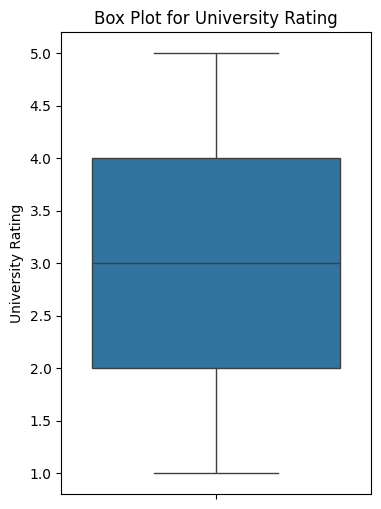

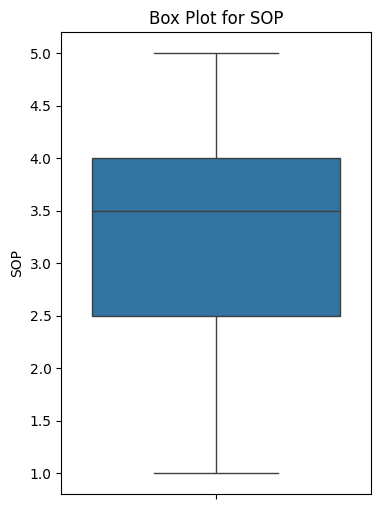

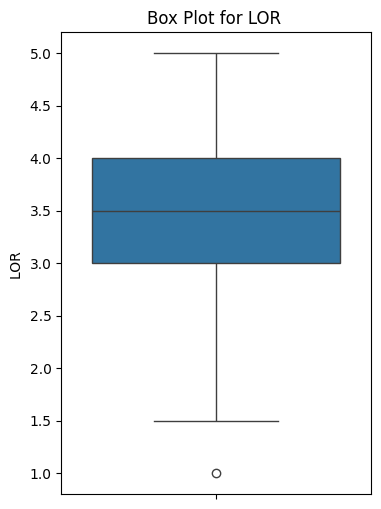

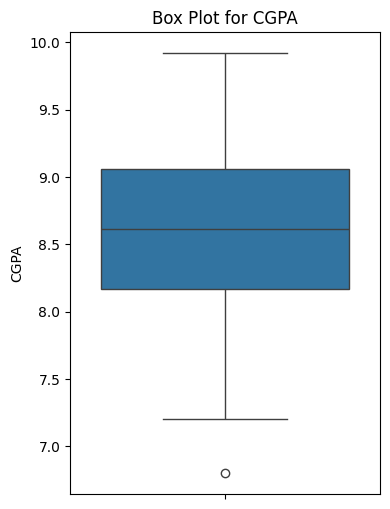

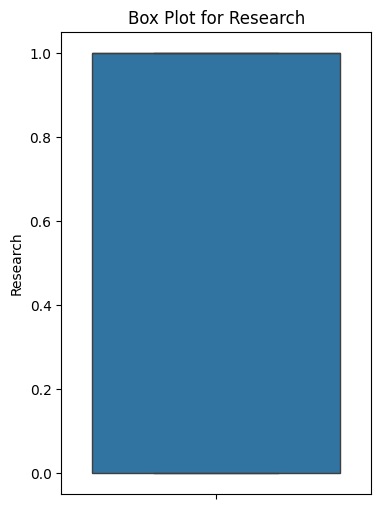

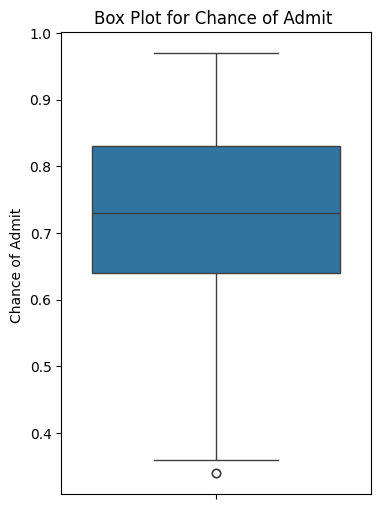

In [17]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [18]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [20]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [21]:
# SOp and LOR are cate or cont
#sop 1-5
#lor 1-5
df["SOP"].unique()
#min -1
#max-5

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [22]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [23]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [24]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


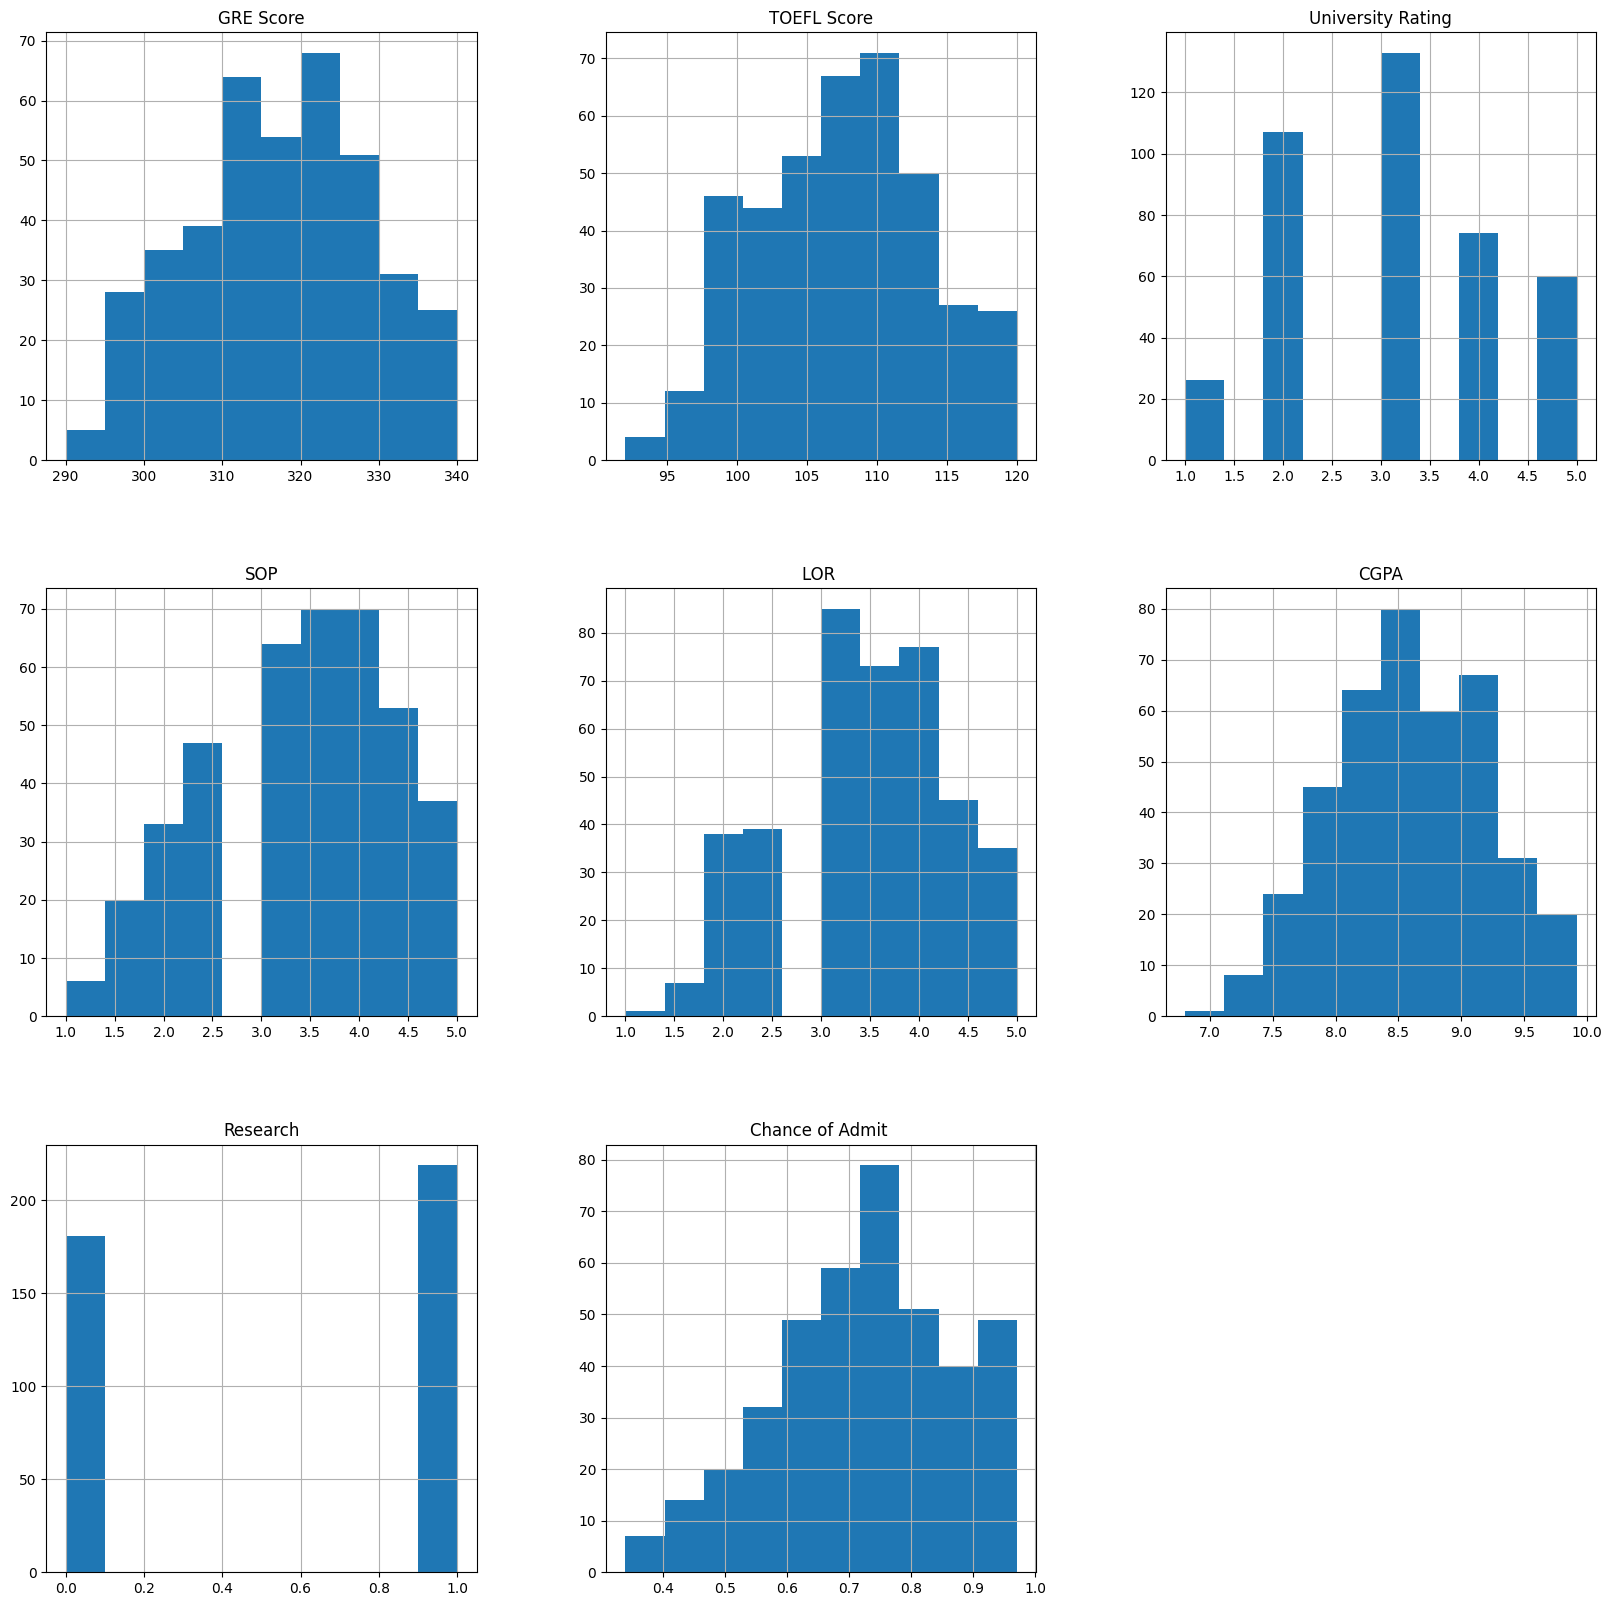

In [25]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

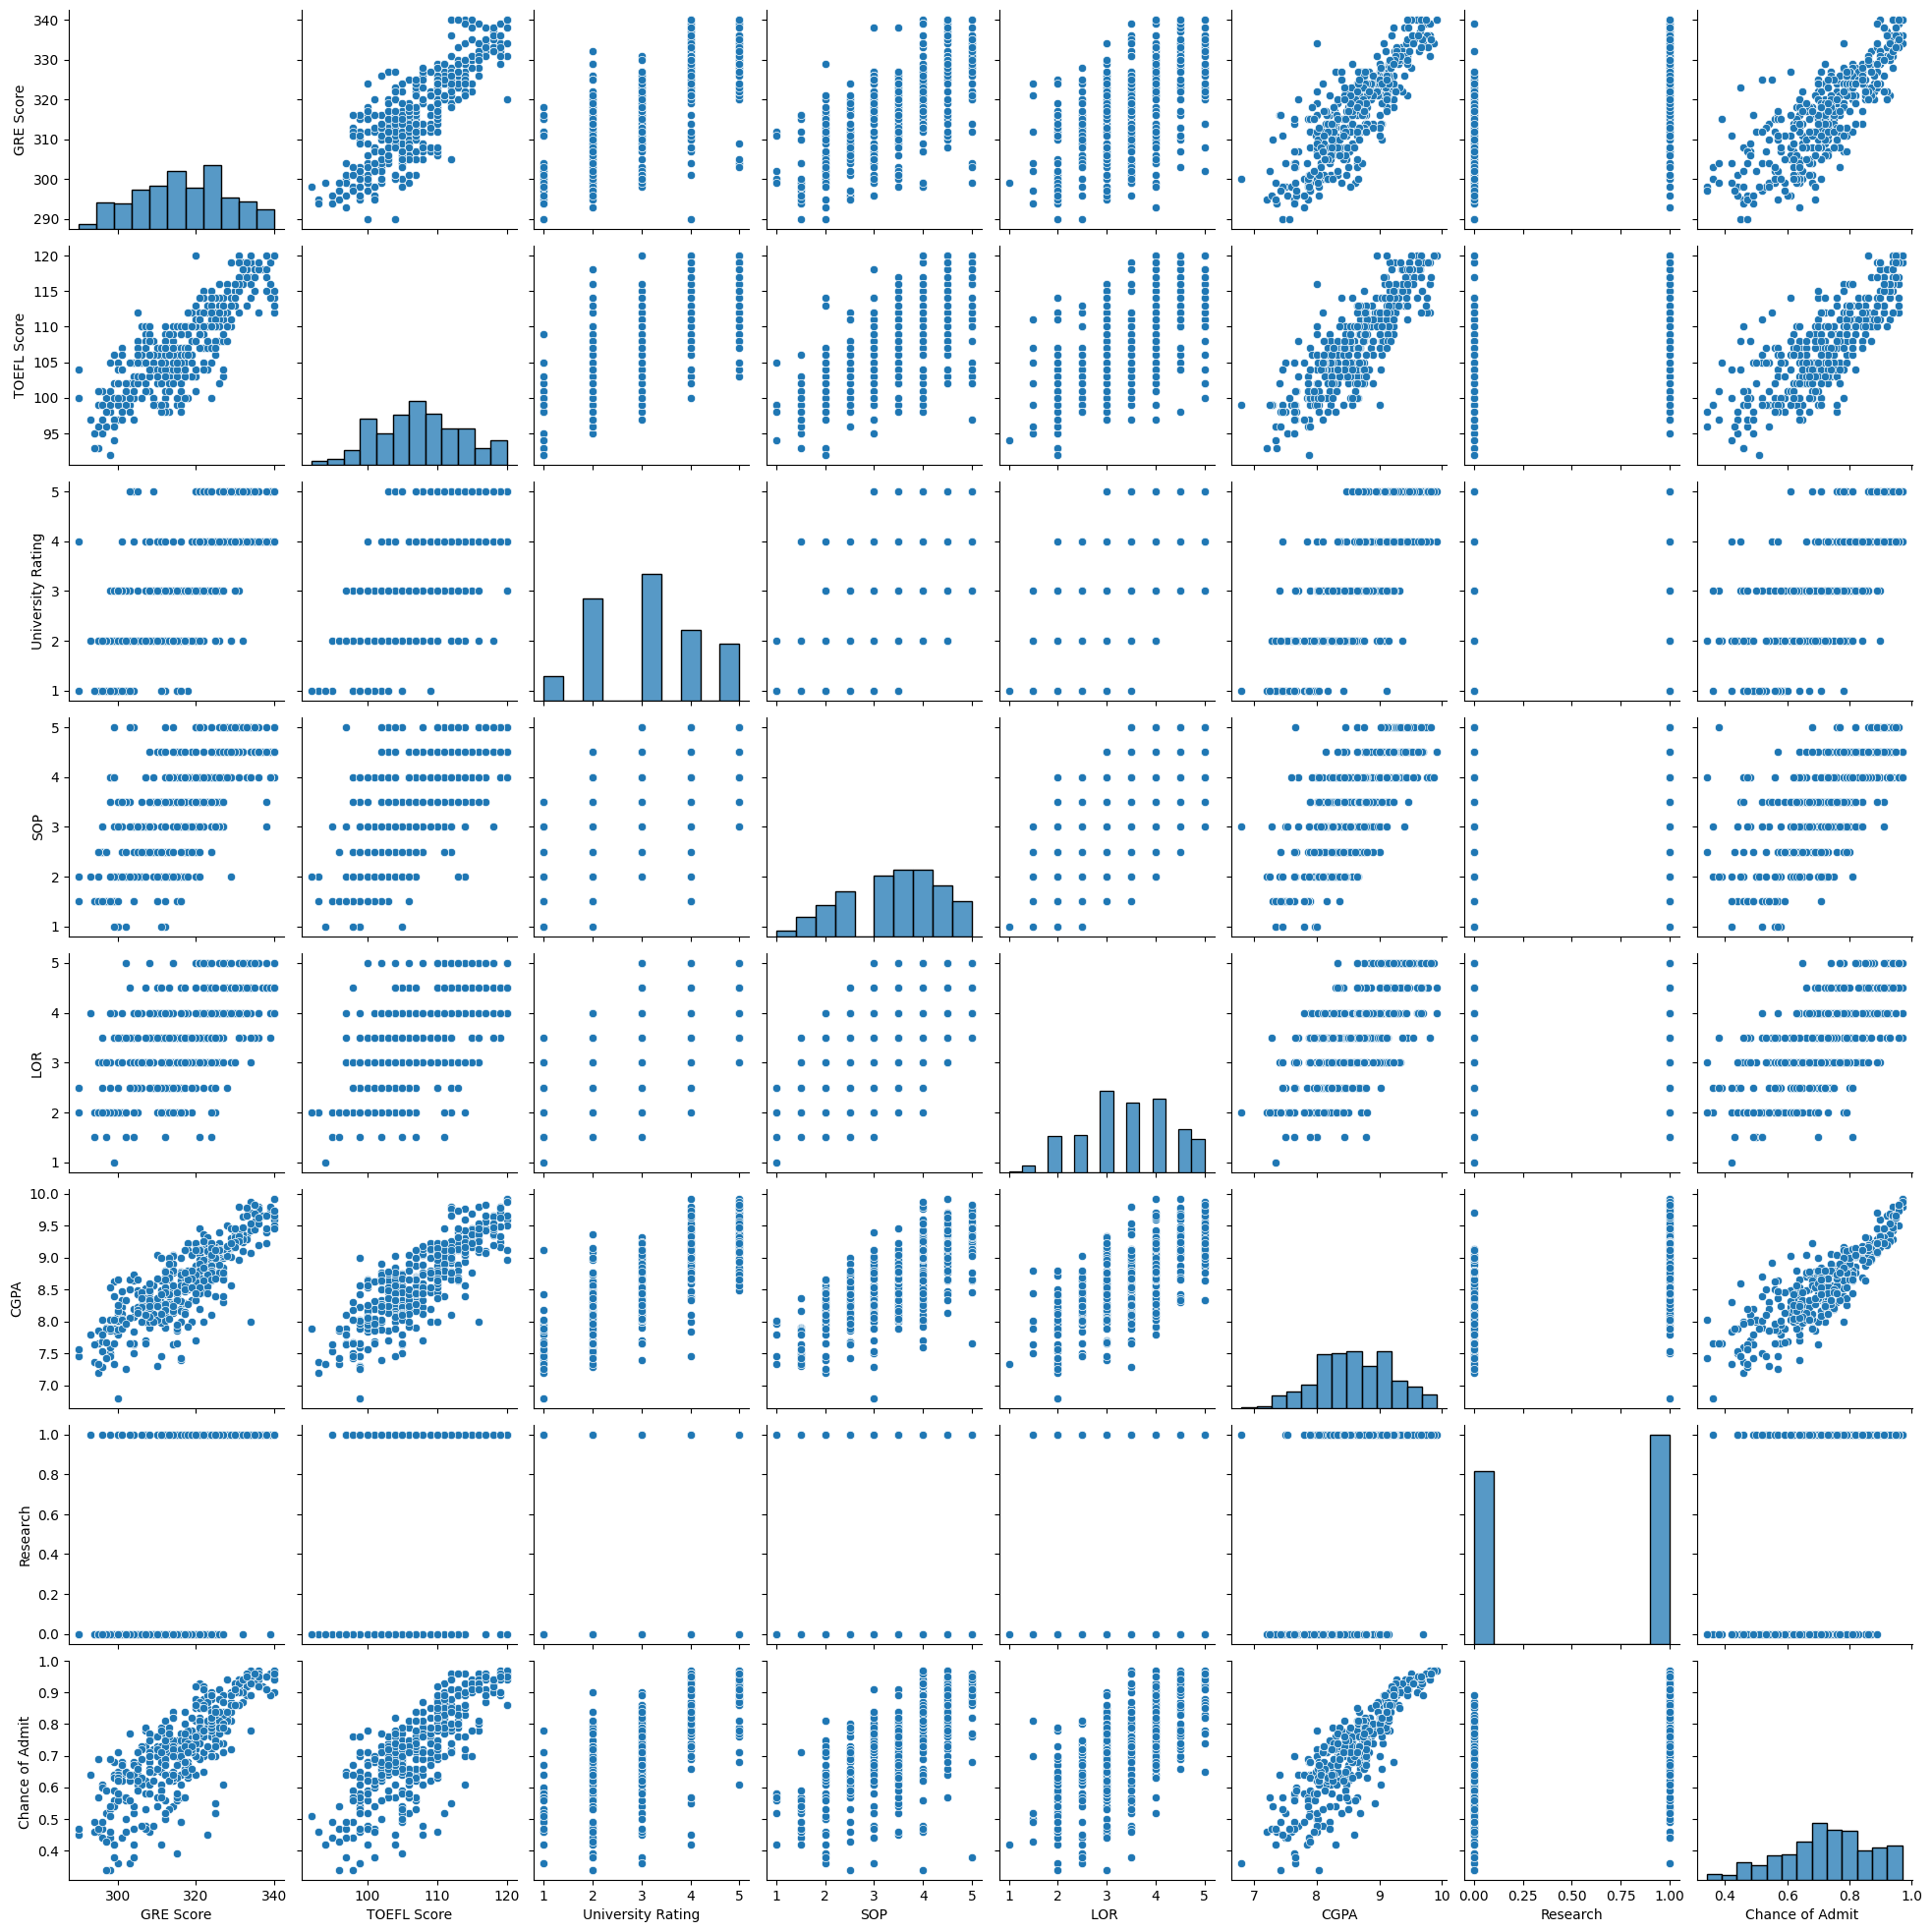

In [26]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

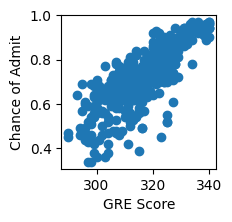

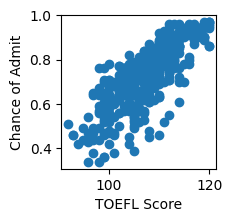

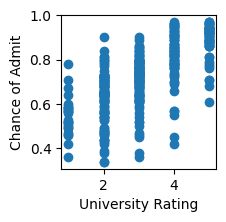

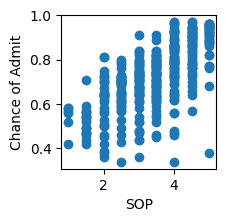

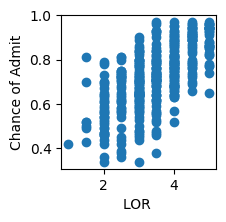

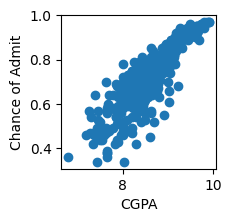

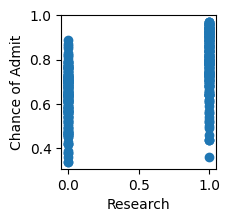

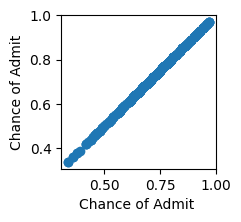

In [27]:
# scatter plot
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

Tofel, gre, cgpa are highly linear with output( chances Of admissions)

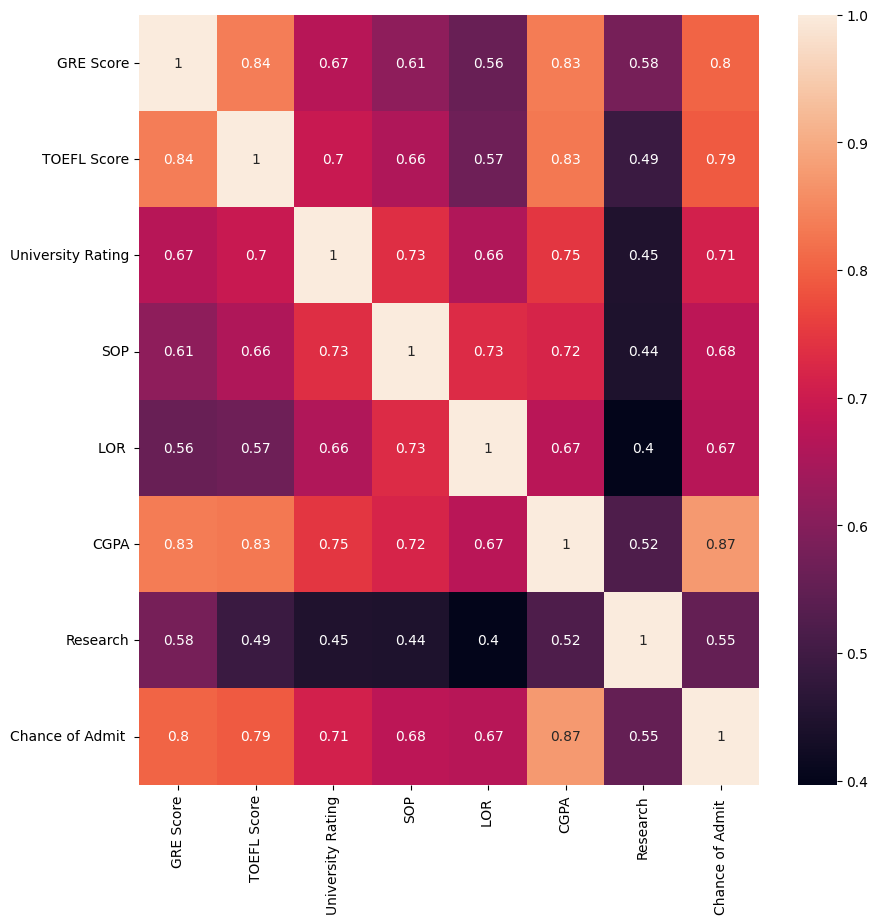

In [28]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with o/p

many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF

In [29]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [30]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [31]:

#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


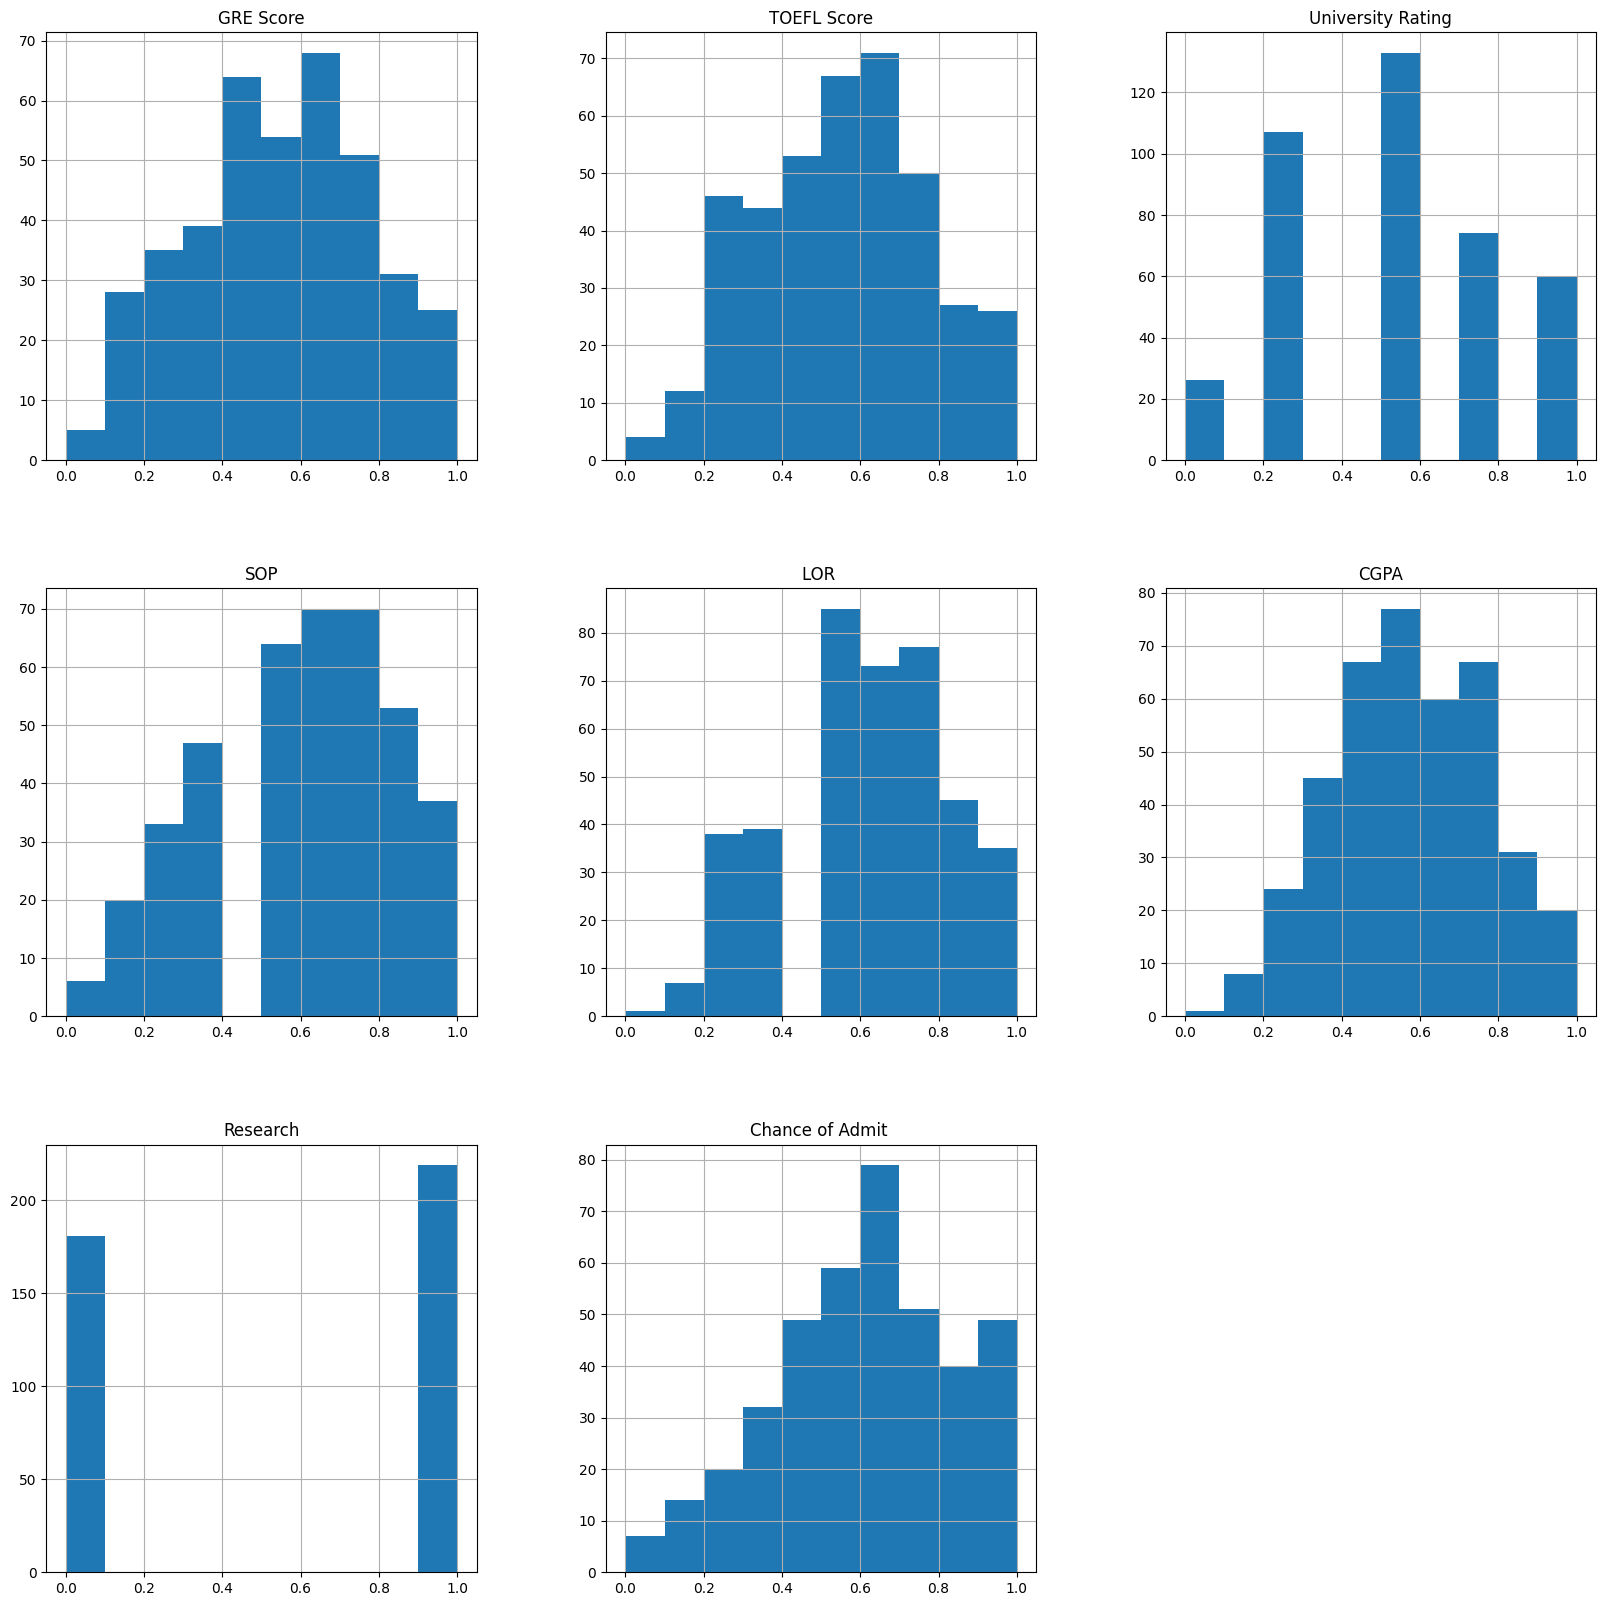

In [32]:
#historgram of scaled data
df_scaled.hist(figsize=(20,20))
plt.show()

In [33]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

In [34]:
df_scaled

StandardScaler()

In [35]:
# Sklearn library
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [36]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


Now, we can use above x&y axises on the fit operation of the linear regression model.

In [37]:
linear_reg.fit(x,y)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_head: predicted Chance of Admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

In [38]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [40]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [41]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

In [42]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

In [43]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [44]:
# test my algo
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [45]:
pd.DataFrame(y_pred)

,0
0,0.651174
1,0.723687
2,0.935368
3,0.821643
4,0.581587
...,...
75,0.721818
76,0.689644
77,0.594426
78,0.878406


In [46]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [47]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [48]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.54, 0.73, 0.94, 0.81, 0.59, 0.91, 0.59, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.91, 0.76, 0.75, 0.71, 0.42, 0.67, 0.97, 0.62, 0.67,
       0.63, 0.56, 0.95, 0.68, 0.71, 0.67, 0.69, 0.84, 0.84, 0.94, 0.48,
       0.42, 0.72, 0.67, 0.72, 0.79, 0.73, 0.92, 0.76, 0.65, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.88, 0.92, 0.72, 0.8 , 0.95, 0.49,
       0.6 , 0.72, 0.83, 0.59, 0.88, 0.64, 0.62, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.87, 0.75, 0.84, 0.93, 0.89, 0.52, 0.76, 0.77,
       0.5 , 0.87, 0.87])

In [50]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.0084825
RMSE for DT: 0.0921004885980525
MAE for DT: 0.06325
R² Score for DT: 0.6715183382293768


In [51]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_split=10,
                      splitter='random')
Best Score (R2): 0.7232106583908245
Test Score (R2): 0.7194905799536745


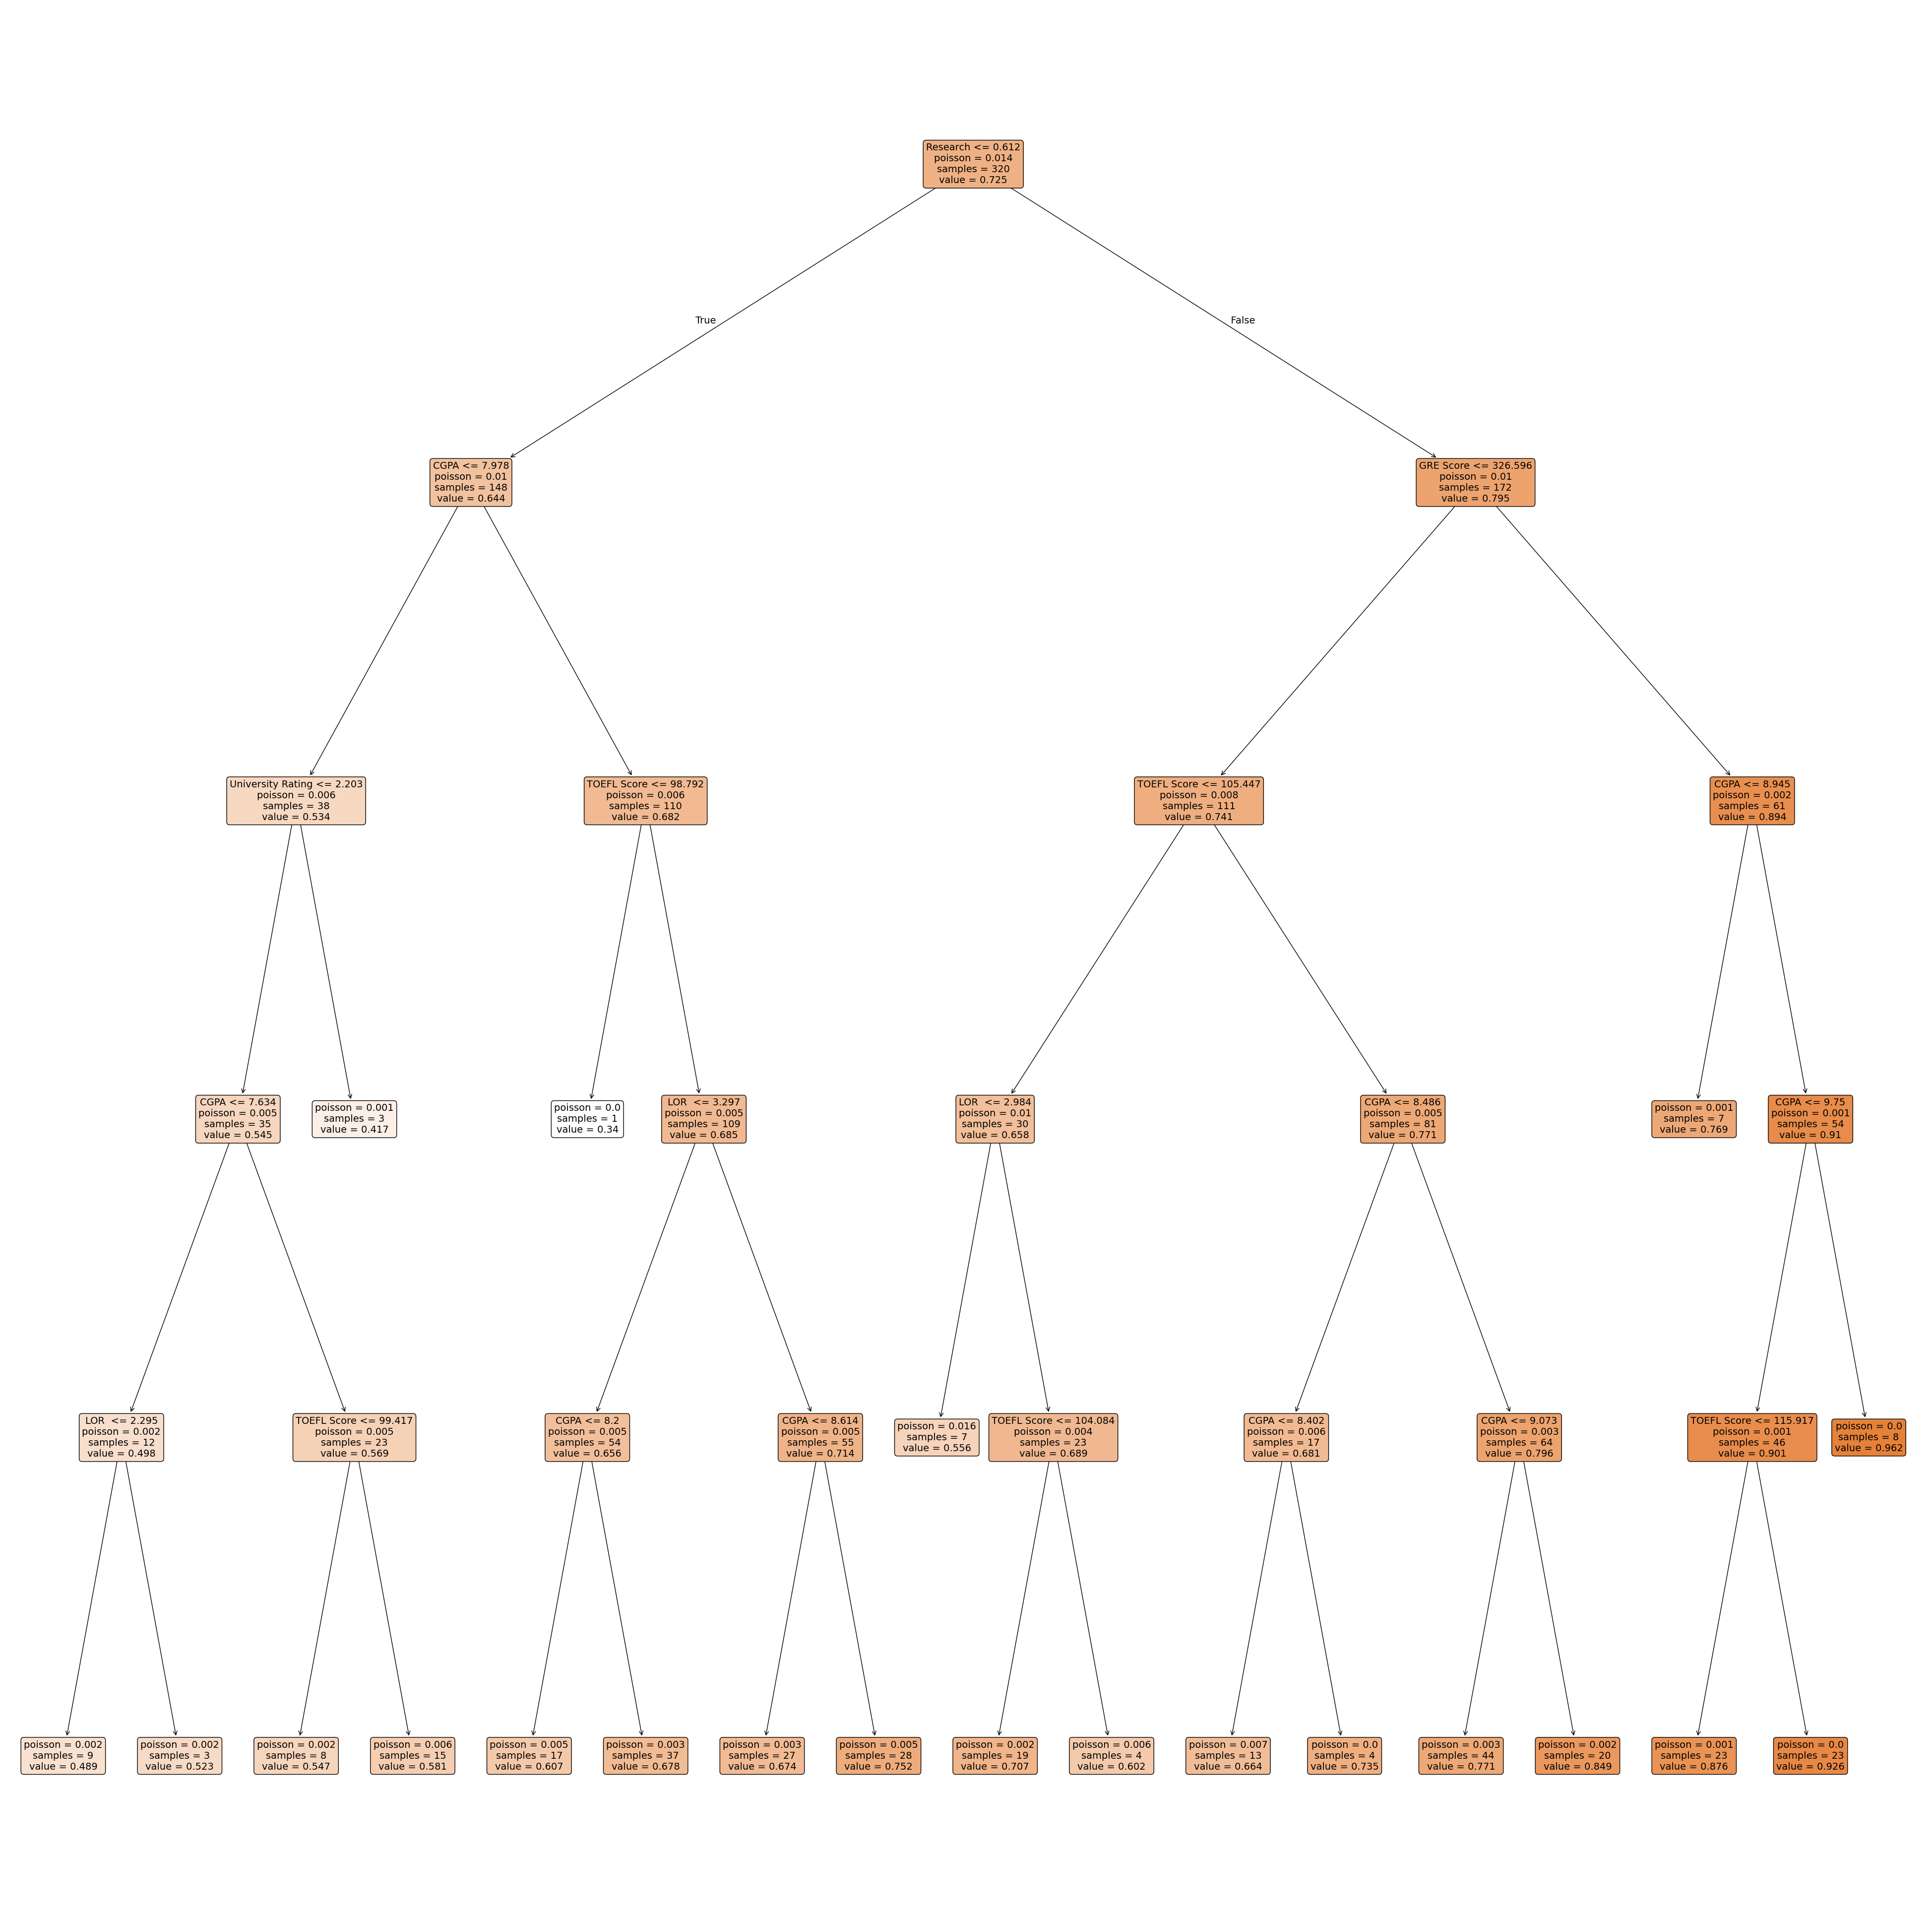

In [52]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [53]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.55571429]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**sklearn.tree.DecisionTreeRegressor:**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**score(self, X, y, sample_weight=None)**

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Parameters:
X : array-like, shape = (n_samples, n_features)
Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
True values for X.

sample_weight : array-like, shape = [n_samples], optional
Sample weights.

Returns:
score : float
R^2 of self.predict(X) wrt. y.

Notes

The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with metrics.r2_score. This will influence the score method of all the multioutput regressors (except for multioutput.MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call metrics.r2_score directly or make a custom scorer with metrics.make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

<a id="5"></a> <br>
5. **Random Forest Regression (RFR)**

Random forest regression combined by  multiple regression.

It chooses n examples, divides the data to sub datas and uses multiple trees.

                     data
                       |
                       |
                    n sample
                       |
                       |
                    sub_data
         tree1   tree2  tree3 .... tree n
         ________________________________
        |           average               |
         ________________________________
                     result
                     
            
                 
                 

RandomForestRegressor(**n_estimators** = 100, **random_state** = 42)

This means we will use 100 tree (DTR) and 42 sample. The algorithm chooses the n samples randomly. We gave a constant number for the random state, therefore the algorithm will select the same 42 examples on the next time.

In [54]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [55]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

In [56]:


print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [57]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.0084825
RMSE for DT: 0.0921004885980525
MAE for DT: 0.06325
R² Score for DT: 0.6715183382293768
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7194905799536745
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [58]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6715183382293768
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7194905799536745
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [59]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.55571429]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


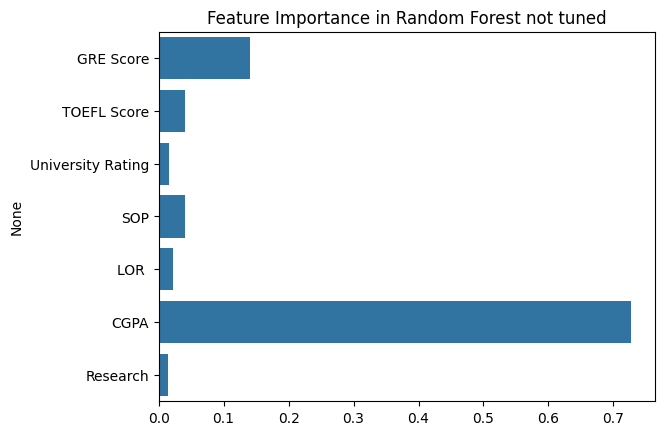

In [60]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()



In [61]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


In [62]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6715183382293768
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7194905799536745
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


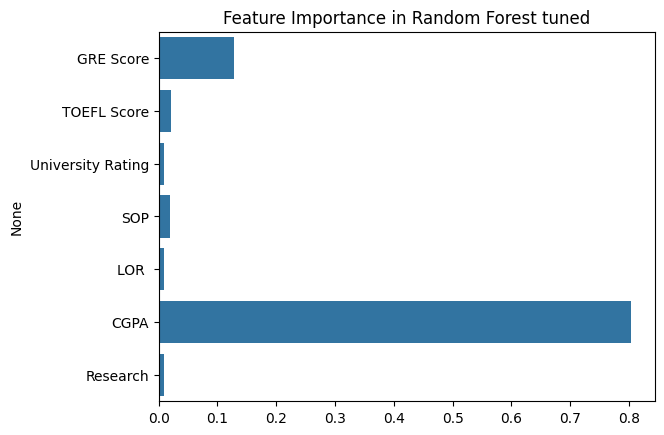

In [63]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()



Random forest tuned is the best model
CPGA and TOFL score have the hightes impact to make an accurate predcition.

In [64]:
print("--------------------Prediction with rf without tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_reg1.predict(c)
print(b3)

--------------------Prediction with rf without tuning----------------------------------------------
[0.47711632]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Project Points

# 1. Random Forest Regressor Tuning

In [65]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, r2_score
#import numpy as np

In [66]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples at a leaf node
}

# Initialize the RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=random_forest_reg,
    param_grid=param_grid,
    cv=5,                         # 5-fold cross-validation
    scoring=['neg_mean_squared_error', 'r2'],  # Track both MSE and R²
    refit='neg_mean_squared_error',  # Optimize based on MSE
    n_jobs=-1,                    # Use all available CPU cores
    verbose=1                     # Show progress
)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to RMSE
best_r2 = grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]

# Print the best parameters and scores
print("Best Parameters:", best_params)
print("Best RMSE (Cross-Validation):", best_rmse)
print("Best R² (Cross-Validation):", best_r2)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test R² Score:", test_r2)

# Print results for all parameter combinations
print("\nAll Parameter Combinations and Results:")
for params, mean_rmse, std_rmse, mean_r2, std_r2 in zip(
    grid_search.cv_results_['params'],
    np.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error']),
    grid_search.cv_results_['std_test_neg_mean_squared_error'],
    grid_search.cv_results_['mean_test_r2'],
    grid_search.cv_results_['std_test_r2']
):
    print(f"Parameters: {params}")
    print(f"Mean RMSE (CV): {mean_rmse:.4f} (+/- {std_rmse:.4f})")
    print(f"Mean R² (CV): {mean_r2:.4f} (+/- {std_r2:.4f})")
    print("---")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE (Cross-Validation): 0.06812784751137833
Best R² (Cross-Validation): 0.752270091865187
Test RMSE: 0.06863304614355753
Test R² Score: 0.8175878298969885

All Parameter Combinations and Results:
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean RMSE (CV): 0.0716 (+/- 0.0011)
Mean R² (CV): 0.7264 (+/- 0.0413)
---
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean RMSE (CV): 0.0707 (+/- 0.0011)
Mean R² (CV): 0.7335 (+/- 0.0424)
---
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean RMSE (CV): 0.0706 (+/- 0.0011)
Mean R² (CV): 0.7338 (+/- 0.0451)
---
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean RMSE (CV): 0.0711 (+/- 0.0011)
Mean R² (CV): 0.7303 (+/- 0.0403)
--

# 2. Decision Tree Regressor Optimization

In [67]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']       # Number of features to consider at each split
}

# Initialize the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=5,                         # 5-fold cross-validation
    scoring=['neg_mean_squared_error', 'r2'],  # Track both MSE and R²
    refit='neg_mean_squared_error',  # Optimize based on MSE
    n_jobs=-1,                    # Use all available CPU cores
    verbose=1                     # Show progress
)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to RMSE
best_r2 = grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]

# Print the best parameters and scores
print("Best Parameters:", best_params)
print("Best RMSE (Cross-Validation):", best_rmse)
print("Best R² (Cross-Validation):", best_r2)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test R² Score:", test_r2)

# Print results for all parameter combinations
print("\nAll Parameter Combinations and Results:")
for params, mean_rmse, std_rmse, mean_r2, std_r2 in zip(
    grid_search.cv_results_['params'],
    np.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error']),
    grid_search.cv_results_['std_test_neg_mean_squared_error'],
    grid_search.cv_results_['mean_test_r2'],
    grid_search.cv_results_['std_test_r2']
):
    print(f"Parameters: {params}")
    print(f"Mean RMSE (CV): {mean_rmse:.4f} (+/- {std_rmse:.4f})")
    print(f"Mean R² (CV): {mean_r2:.4f} (+/- {std_r2:.4f})")
    print("---")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE (Cross-Validation): 0.07472958640985021
Best R² (Cross-Validation): 0.6992231901035337
Test RMSE: 0.07352634143667755
Test R² Score: 0.7906498993195812

All Parameter Combinations and Results:
Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean RMSE (CV): 0.0947 (+/- 0.0020)
Mean R² (CV): 0.5207 (+/- 0.0828)
---
Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean RMSE (CV): 0.0921 (+/- 0.0017)
Mean R² (CV): 0.5479 (+/- 0.0611)
---
Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean RMSE (CV): 0.0838 (+/- 0.0021)
Mean R² (CV): 0.6271 (+/- 0.0841)
---
Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Me

# 3. Feature Selection-Based Modeling

In [68]:
# Step 1: Run a simplified GridSearchCV for Random Forest to get best_rf_params
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
rf_grid_search.fit(x_train, y_train)
best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Parameters:", best_rf_params)

# Step 2: Train Random Forest to get feature importances
rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importances and select top 5 features
feature_importances = rf_model.feature_importances_
if isinstance(x_train, pd.DataFrame):
    feature_names = x_train.columns
else:
    feature_names = [f"Feature_{i}" for i in range(x_train.shape[1])]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
top_5_feature_names = top_5_features['Feature'].values
print("\nTop 5 Features:")
print(top_5_features)

# Step 3: Subset the training and test data to include only top 5 features
if isinstance(x_train, pd.DataFrame):
    x_train_reduced = x_train[top_5_feature_names]
    x_test_reduced = x_test[top_5_feature_names]
else:
    top_5_indices = top_5_features.index.values
    x_train_reduced = x_train[:, top_5_indices]
    x_test_reduced = x_test[:, top_5_indices]

# Step 4: Retrain Random Forest with top 5 features
rf_reduced = RandomForestRegressor(**best_rf_params, random_state=42)
rf_reduced.fit(x_train_reduced, y_train)
y_pred_rf_reduced = rf_reduced.predict(x_test_reduced)
rf_reduced_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_reduced))
rf_reduced_r2 = r2_score(y_test, y_pred_rf_reduced)

# Step 5: Retrain Decision Tree with top 5 features
# Use default parameters if best_dt_params is not available; replace with actual if you have them
best_dt_params = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}  # Placeholder
dt_reduced = DecisionTreeRegressor(**best_dt_params, random_state=42)
dt_reduced.fit(x_train_reduced, y_train)
y_pred_dt_reduced = dt_reduced.predict(x_test_reduced)
dt_reduced_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt_reduced))
dt_reduced_r2 = r2_score(y_test, y_pred_dt_reduced)

# Step 6: Compare with original models (placeholders for original performance)
# Replace these with actual values from your previous runs
rf_original_rmse = 0.0  # Replace with actual RMSE from original Random Forest
rf_original_r2 = 0.0    # Replace with actual R² from original Random Forest
dt_original_rmse = 0.0  # Replace with actual RMSE from original Decision Tree
dt_original_r2 = 0.0    # Replace with actual R² from original Decision Tree

print("\nPerformance Comparison:")
print("\nRandom Forest Results:")
print(f"Original RMSE (all features): {rf_original_rmse:.4f}")
print(f"Reduced RMSE (top 5 features): {rf_reduced_rmse:.4f}")
print(f"Original R² (all features): {rf_original_r2:.4f}")
print(f"Reduced R² (top 5 features): {rf_reduced_r2:.4f}")

print("\nDecision Tree Results:")
print(f"Original RMSE (all features): {dt_original_rmse:.4f}")
print(f"Reduced RMSE (top 5 features): {dt_reduced_rmse:.4f}")
print(f"Original R² (all features): {dt_original_r2:.4f}")
print(f"Reduced R² (top 5 features): {dt_reduced_r2:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Top 5 Features:
       Feature  Importance
5         CGPA    0.748868
0    GRE Score    0.139570
1  TOEFL Score    0.035988
3          SOP    0.033350
4         LOR     0.016651

Performance Comparison:

Random Forest Results:
Original RMSE (all features): 0.0000
Reduced RMSE (top 5 features): 0.0700
Original R² (all features): 0.0000
Reduced R² (top 5 features): 0.8101

Decision Tree Results:
Original RMSE (all features): 0.0000
Reduced RMSE (top 5 features): 0.1010
Original R² (all features): 0.0000
Reduced R² (top 5 features): 0.6052


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# 4. Handling Multicollinearity in Linear Regression

In [69]:
# Check for statsmodels availability
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    statsmodels_available = True
except ImportError:
    print("Warning: statsmodels not installed. Falling back to correlation-based feature selection.")
    print("Install statsmodels using: pip install statsmodels")
    statsmodels_available = False

# Step 1: Convert to DataFrame if numpy arrays
if isinstance(x_train, np.ndarray):
    x_train = pd.DataFrame(x_train, columns=[f"Feature_{i}" for i in range(x_train.shape[1])])
    x_test = pd.DataFrame(x_test, columns=x_train.columns)

# Step 2: Compute correlation matrix
correlation_matrix = x_train.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png')
plt.close()

# Step 3: Define VIF calculation function
def calculate_vif(data):
    data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Step 4: Fallback correlation-based feature removal
def remove_high_corr_features(data, corr_threshold=0.8):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    print(f"Removing features with correlation > {corr_threshold}: {to_drop}")
    return data.drop(columns=to_drop), to_drop

# Step 5: Handle multicollinearity
if statsmodels_available:
    try:
        vif_data = calculate_vif(x_train)
        print("\nInitial VIF Scores:")
        print(vif_data)

        # Iteratively remove features with VIF > 5
        def remove_high_vif_features(data, vif_threshold=5):
            while True:
                vif_data = calculate_vif(data)
                max_vif = vif_data['VIF'].max()
                if max_vif > vif_threshold:
                    feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
                    print(f"Removing {feature_to_remove} with VIF = {max_vif:.2f}")
                    data = data.drop(columns=feature_to_remove)
                else:
                    break
            return data, vif_data

        x_train_reduced, final_vif_data = remove_high_vif_features(x_train.copy())
        print("\nFinal VIF Scores after Removal:")
        print(final_vif_data)
    except Exception as e:
        print(f"\nError in VIF calculation: {e}")
        print("Falling back to correlation-based feature selection...")
        x_train_reduced, dropped_features = remove_high_corr_features(x_train.copy())
        final_vif_data = pd.DataFrame()  # Empty VIF data if fallback used
else:
    print("\nUsing correlation-based feature selection due to missing statsmodels.")
    x_train_reduced, dropped_features = remove_high_corr_features(x_train.copy())
    final_vif_data = pd.DataFrame()  # Empty VIF data if statsmodels unavailable

# Step 6: Subset test data
x_test_reduced = x_test[x_train_reduced.columns]

# Step 7: Train original Linear Regression model
lr_original = LinearRegression()
lr_original.fit(x_train, y_train)
y_pred_original = lr_original.predict(x_test)
original_rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))
original_r2 = r2_score(y_test, y_pred_original)

# Step 8: Train Linear Regression model with reduced features
lr_reduced = LinearRegression()
lr_reduced.fit(x_train_reduced, y_train)
y_pred_reduced = lr_reduced.predict(x_test_reduced)
reduced_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
reduced_r2 = r2_score(y_test, y_pred_reduced)

# Step 9: Compare performance
print("\nPerformance Comparison:")
print("\nOriginal Linear Regression (All Features):")
print(f"RMSE: {original_rmse:.4f}")
print(f"R²: {original_r2:.4f}")

print("\nReduced Linear Regression (After Handling Multicollinearity):")
print(f"RMSE: {reduced_rmse:.4f}")
print(f"R²: {reduced_r2:.4f}")

# Save VIF data or dropped features for reference
if not final_vif_data.empty:
    final_vif_data.to_csv('final_vif_data.csv', index=False)
else:
    pd.DataFrame({'Dropped_Features': dropped_features}).to_csv('dropped_features.csv', index=False)


Correlation Matrix:
                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827252           0.671806  0.609402   
TOEFL Score         0.827252     1.000000           0.701191  0.652512   
University Rating   0.671806     0.701191           1.000000  0.736411   
SOP                 0.609402     0.652512           0.736411  1.000000   
LOR                 0.542508     0.537143           0.642423  0.726850   
CGPA                0.833607     0.817221           0.751911  0.714617   
Research            0.590634     0.511945           0.452712  0.422836   

                       LOR       CGPA  Research  
GRE Score          0.542508  0.833607  0.590634  
TOEFL Score        0.537143  0.817221  0.511945  
University Rating  0.642423  0.751911  0.452712  
SOP                0.726850  0.714617  0.422836  
LOR                1.000000  0.665238  0.385209  
CGPA               0.665238  1.000000  0.507568  
Research           0.385209  0.50756

Multicollinearity Analysis
The original dataset exhibits significant multicollinearity, as evidenced by high Variance Inflation Factors (VIFs) and strong correlations among several predictor variables—particularly GRE Score, TOEFL Score, and CGPA. These variables are highly correlated with each other, which violates one of the key assumptions of linear regression: that the independent variables should not be highly correlated.

While the original regression model showed strong overall performance (with an R² value of 0.8212, indicating that approximately 82% of the variance in the target variable was explained by the model), multicollinearity likely led to unstable and unreliable regression coefficients. In such cases, even small changes in the data can result in large variations in the estimated coefficients, making interpretation difficult and potentially misleading.